## Initial set up

In [1]:
# Imports

import pandas as pd
import numpy as np
import dask 
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import time
import folium 
import graphviz, toolz, cloudpickle
import matplotlib
from matplotlib import rcParams
import xgboost as xgb
import pandas_profiling
import scipy

import warnings

In [2]:
import time
import datetime as dt

In [3]:
import matplotlib.dates as dates
import matplotlib.ticker as ticker

In [4]:
import os
os.chdir("../")

In [5]:
%matplotlib inline

## 1. EDA 

Goal of this section is to combine and merge the data into a cohesive file 

###  1.1 Stations data

#### 1.1.1 Merging the data into one df

In [6]:
!dir data

2014  2015  2016  2017


In [7]:
#Load the individual files and mark the year 

stations_2014= pd.read_csv("./data/2014/Stations_2014.csv")
stations_2015= pd.read_csv("./data/2015/Stations_2015.csv")
stations_2016= pd.read_csv("./data/2016/Stations_2016.csv")
stations_2017= pd.read_csv("./data/2017/Stations_2017.csv")

stations_2014["Year"] = 2014
stations_2015["Year"] = 2015
stations_2016["Year"] = 2016
stations_2017["Year"] = 2017

In [8]:
stations_2015.columns

Index(['code', 'name', 'latitude', 'longitude', 'Year'], dtype='object')

In [9]:
# Revew shapes of the stations of each year 

print("2014: ", stations_2014.shape, ", 2015: ", stations_2015.shape, "2016: ", stations_2016.shape, 
     "2017: ", stations_2017.shape)

2014:  (459, 5) , 2015:  (460, 5) 2016:  (465, 5) 2017:  (546, 5)


In [10]:
# Merge all the dataframes into a station master

stations_master = pd.merge(stations_2014, stations_2015, how = "outer", on = ['code', 'name', 'latitude', 'longitude'], 
                          suffixes = ('_2014','_2015'))
stations_master = pd.merge(stations_master, stations_2016, how = "outer", on = ['code', 'name', 'latitude', 'longitude'])
stations_master = pd.merge(stations_master, stations_2017, how = "outer", on = ['code', 'name', 'latitude', 'longitude'],
                          suffixes = ('_2016', '_2017'))

In [11]:
unmatched_stations = stations_master[stations_master.isna().sum(axis=1)>0].sort_values(by=["latitude", "longitude"])
matched_stations = stations_master[stations_master.isna().sum(axis=1)==0].sort_values(by=["latitude", "longitude"])
unmatched_stations.head(30)

code                                   name   latitude  longitude  \
465  7015                    LaSalle / 4e avenue  45.430740 -73.591911   
466  6715         Natatorium (LaSalle / Rolland)  45.444408 -73.575568   
449  6715         Natatorium (LaSalle / Rolland)  45.444433 -73.575788   
467  7048                        Métro Angrignon  45.446534 -73.603541   
468  7056                     Godin / Bannantyne  45.447554 -73.577263   
469  7051                        Jogues / Allard  45.449901 -73.600251   
470  6706                     Beatty / de Verdun  45.450730 -73.572575   
343  6706                        Beatty / Verdun  45.450837 -73.572446   
471  7059                    Argyle / Bannantyne  45.453246 -73.576815   
419  6309                     5e avenue / Verdun  45.456049 -73.571877   
472  6309                  5e avenue / de Verdun  45.456049 -73.571877   
441  6707                        Drake / de Sève  45.456351 -73.582292   
473  6707      Métro Jolicoeur (Drake / de Sève)  45.456498 -73.582144   
464  6754                           Eadie/Dubois  45.457597 -73.590529   
474  6754                         Eadie / Dubois  45.457597 -73.590529   
475  7057                 2e avenue / Wellington  45.457894 -73.567528   
476  7010                   Belmore / Sherbrooke  45.459233 -73.637405   
477  6426  Métro Verdun (Willibrord / de Verdun)  45.459488 -73.572092   
436  6428     Berlioz / Boul de l'Ile des Soeurs  45.459593 -73.544377   
331  6426                    Willibrord / Verdun  45.459707 -73.571438   
478  6428          Berlioz / de l'Île des Soeurs  45.459986 -73.543956   
479  7058                    Gordon / Wellington  45.461078 -73.567307   
453  6742                        Briand / Carron  45.462362 -73.596650   
480  6742                      Briand / le Caron  45.462362 -73.596650   
481  7060                de l'Église / de Verdun  45.463001 -73.571569   
482  6379               de l'Église / Bannantyne  45.463254 -73.575879   
332  6379               Bannantyne / de l'Église  45.463257 -73.575621   
483  7013                 Benny Crescent / Benny  45.464315 -73.625570   
484  6115                    Benny / de Monkland  45.466914 -73.631704   
335  6115                       Benny / Monkland  45.466965 -73.631664   

     Year_2014  Year_2015  Year_2016  Year_2017  
465        NaN        NaN        NaN     2017.0  
466        NaN        NaN        NaN     2017.0  
449     2014.0     2015.0     2016.0        NaN  
467        NaN        NaN        NaN     2017.0  
468        NaN        NaN        NaN     2017.0  
469        NaN        NaN        NaN     2017.0  
470        NaN        NaN        NaN     2017.0  
343     2014.0     2015.0     2016.0        NaN  
471        NaN        NaN        NaN     2017.0  
419     2014.0     2015.0     2016.0        NaN  
472        NaN        NaN        NaN     2017.0  
441     2014.0     2015.0     2016.0        NaN  
473        NaN        NaN        NaN     2017.0  
464        NaN        NaN     2016.0        NaN  
474        NaN        NaN        NaN     2017.0  
475        NaN        NaN        NaN     2017.0  
476        NaN        NaN        NaN     2017.0  
477        NaN        NaN        NaN     2017.0  
436     2014.0     2015.0     2016.0        NaN  
331     2014.0     2015.0     2016.0        NaN  
478        NaN        NaN        NaN     2017.0  
479        NaN        NaN        NaN     2017.0  
453     2014.0     2015.0     2016.0        NaN  
480        NaN        NaN        NaN     2017.0  
481        NaN        NaN        NaN     2017.0  
482        NaN        NaN        NaN     2017.0  
332     2014.0     2015.0     2016.0        NaN  
483        NaN        NaN        NaN     2017.0  
484        NaN        NaN        NaN     2017.0  
335     2014.0     2015.0     2016.0        NaN

In [12]:
print( stations_master.shape)
print( unmatched_stations.shape)
print( matched_stations.shape)

(775, 8)
(540, 8)
(235, 8)


In [13]:
# no. of same stations with different name or code:
unmatched_stations.duplicated(subset=['latitude', 'longitude'], keep = False).sum()

94

In [14]:
unmatched_stations[unmatched_stations.duplicated(subset=['latitude', 'longitude'], keep = False)]

code                                       name   latitude  longitude  \
419  6309                         5e avenue / Verdun  45.456049 -73.571877   
472  6309                      5e avenue / de Verdun  45.456049 -73.571877   
464  6754                               Eadie/Dubois  45.457597 -73.590529   
474  6754                             Eadie / Dubois  45.457597 -73.590529   
453  6742                            Briand / Carron  45.462362 -73.596650   
..    ...                                        ...        ...        ...   
746  6737        Jacques-Casault / Christophe-Colomb  45.552123 -73.630103   
418  6701                           Marseille / Viau  45.563921 -73.548912   
766  6701                        de Marseille / Viau  45.563921 -73.548912   
289  6721                      Cadillac / Sherbrooke  45.577136 -73.546289   
772  6721  Métro Cadillac (Sherbrooke / de Cadillac)  45.577136 -73.546289   

     Year_2014  Year_2015  Year_2016  Year_2017  
419     2014.0     2015.0     2016.0        NaN  
472        NaN        NaN        NaN     2017.0  
464        NaN        NaN     2016.0        NaN  
474        NaN        NaN        NaN     2017.0  
453     2014.0     2015.0     2016.0        NaN  
..         ...        ...        ...        ...  
746        NaN        NaN        NaN     2017.0  
418     2014.0     2015.0     2016.0        NaN  
766        NaN        NaN        NaN     2017.0  
289     2014.0     2015.0     2016.0        NaN  
772        NaN        NaN        NaN     2017.0  

[94 rows x 8 columns]

The above 47 stations simply have different names, and represent the exact same
location (from a lat-long perspective). So we will drop the older versions and keep the new versions

In [15]:
unique_unmatched_stations = unmatched_stations[~(unmatched_stations.duplicated(subset=['latitude', 'longitude'], keep = "last"))] 
unique_unmatched_stations.sort_values(by='code')

code                                 name   latitude  longitude  \
284  5002             St-Charles / Châteauguay  45.533200 -73.515600   
663  5002             St-Charles / Montarville  45.533703 -73.515283   
647  5003                      Place Longueuil  45.529512 -73.517691   
357  5003                      Place Longueuil  45.529400 -73.517800   
322  5005            St-Charles / St-Sylvestre  45.536408 -73.512776   
..    ...                                  ...        ...        ...   
628  7077               Fullum / Jean Langlois  45.526128 -73.546002   
667  7078                 Hochelaga / Chapleau  45.534453 -73.559652   
533  7079                  Gauvin / Notre-Dame  45.500043 -73.560412   
546  7080  President-Kennedy / Robert Bourassa  45.504407 -73.572543   
515  7081             Lincoln / Lambert Closse  45.491384 -73.586013   

     Year_2014  Year_2015  Year_2016  Year_2017  
284     2014.0     2015.0     2016.0        NaN  
663        NaN        NaN        NaN     2017.0  
647        NaN        NaN        NaN     2017.0  
357     2014.0     2015.0     2016.0        NaN  
322     2014.0     2015.0     2016.0        NaN  
..         ...        ...        ...        ...  
628        NaN        NaN        NaN     2017.0  
667        NaN        NaN        NaN     2017.0  
533        NaN        NaN        NaN     2017.0  
546        NaN        NaN        NaN     2017.0  
515        NaN        NaN        NaN     2017.0  

[493 rows x 8 columns]

In [16]:
# Even though the code is the same, the location and/ or name have changed in 2017 in some cases. 

#HOw many of the 493 have the same code? 

unique_unmatched_stations[unique_unmatched_stations.duplicated(subset=["code"], keep=False)].sort_values(by='code')

code                           name   latitude  longitude  Year_2014  \
284  5002       St-Charles / Châteauguay  45.533200 -73.515600     2014.0   
663  5002       St-Charles / Montarville  45.533703 -73.515283        NaN   
357  5003                Place Longueuil  45.529400 -73.517800     2014.0   
647  5003                Place Longueuil  45.529512 -73.517691        NaN   
322  5005      St-Charles / St-Sylvestre  45.536408 -73.512776     2014.0   
..    ...                            ...        ...        ...        ...   
749  6925      Louis-Hébert / Jean-Talon  45.553139 -73.602711        NaN   
416  6929         St-André / St-Grégoire  45.531330 -73.591550     2014.0   
653  6929         St-André / St-Grégoire  45.531412 -73.591749        NaN   
461  6930            Paul Boutet / Jarry  45.559178 -73.614130        NaN   
763  6930  Paul Boutet / des Regrattiers  45.559842 -73.615447        NaN   

     Year_2015  Year_2016  Year_2017  
284     2015.0     2016.0        NaN  
663        NaN        NaN     2017.0  
357     2015.0     2016.0        NaN  
647        NaN        NaN     2017.0  
322     2015.0     2016.0        NaN  
..         ...        ...        ...  
749        NaN        NaN     2017.0  
416     2015.0     2016.0        NaN  
653        NaN        NaN     2017.0  
461        NaN     2016.0        NaN  
763        NaN        NaN     2017.0  

[364 rows x 8 columns]

In [17]:
# For the sake of simplicity, in these 182 stations, we will assume the 2017 name and lat-long, 
# we are assuming (perhaps, safely) that the lat-long difference is quite small 

unmatched_stations_codes = unique_unmatched_stations[~unique_unmatched_stations.sort_values(by='code')\
                                                     .duplicated(subset=['code'], keep = 'last')]

unmatched_stations_codes.sort_values(by='code')

<ipython-input-17-1e054f537fa0>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unmatched_stations_codes = unique_unmatched_stations[~unique_unmatched_stations.sort_values(by='code')\


code                                            name   latitude  \
663  5002                        St-Charles / Montarville  45.533703   
357  5003                                 Place Longueuil  45.529400   
678  5005                       St-Charles / St-Sylvestre  45.536378   
559  6001  Hôtel-de-Ville 2 (du Champs-de-Mars / Gosford)  45.509328   
253  6002                          Ste-Catherine / Dézéry  45.539230   
..    ...                                             ...        ...   
628  7077                          Fullum / Jean Langlois  45.526128   
667  7078                            Hochelaga / Chapleau  45.534453   
533  7079                             Gauvin / Notre-Dame  45.500043   
546  7080             President-Kennedy / Robert Bourassa  45.504407   
515  7081                        Lincoln / Lambert Closse  45.491384   

     longitude  Year_2014  Year_2015  Year_2016  Year_2017  
663 -73.515283        NaN        NaN        NaN     2017.0  
357 -73.517800     2014.0     2015.0     2016.0        NaN  
678 -73.512642        NaN        NaN        NaN     2017.0  
559 -73.554347        NaN        NaN        NaN     2017.0  
253 -73.541082     2014.0     2015.0     2016.0        NaN  
..         ...        ...        ...        ...        ...  
628 -73.546002        NaN        NaN        NaN     2017.0  
667 -73.559652        NaN        NaN        NaN     2017.0  
533 -73.560412        NaN        NaN        NaN     2017.0  
546 -73.572543        NaN        NaN        NaN     2017.0  
515 -73.586013        NaN        NaN        NaN     2017.0  

[311 rows x 8 columns]

In [18]:
# They all look like new additions from 2017? 
unmatched_stations_codes.isna().sum()

code           0
name           0
latitude       0
longitude      0
Year_2014    217
Year_2015    216
Year_2016    214
Year_2017     96
dtype: int64

In [19]:
#Some 96 stations were only present during 2014- 2016. Versus ~217 stations were pretty much created in 2017. 

unmatched_stations_codes[unmatched_stations_codes["Year_2017"].isna()]
#We try to look for any special information regarding the locations that were disabled in 2017

code                             name   latitude  longitude  Year_2014  \
343  6706                  Beatty / Verdun  45.450837 -73.572446     2014.0   
441  6707                  Drake / de Sève  45.456351 -73.582292     2014.0   
331  6426              Willibrord / Verdun  45.459707 -73.571438     2014.0   
335  6115                 Benny / Monkland  45.466965 -73.631664     2014.0   
338  6363          Côte St-Antoine / Royal  45.468800 -73.619800     2014.0   
..    ...                              ...        ...        ...        ...   
307  6033            16e avenue / Beaubien  45.558481 -73.583304     2014.0   
66   6395       Pierre-de-Coubertin / Aird  45.558960 -73.548687     2014.0   
270  6735  François-Perrault / L.-O.-David  45.561396 -73.601544     2014.0   
463  6753          St-Zotique / 39e avenue  45.573471 -73.574975        NaN   
423  6722    Bossuet / Pierre-de-Coubertin  45.573733 -73.539446     2014.0   

     Year_2015  Year_2016  Year_2017  
343     2015.0     2016.0        NaN  
441     2015.0     2016.0        NaN  
331     2015.0     2016.0        NaN  
335     2015.0     2016.0        NaN  
338     2015.0     2016.0        NaN  
..         ...        ...        ...  
307     2015.0     2016.0        NaN  
66      2015.0     2016.0        NaN  
270     2015.0     2016.0        NaN  
463        NaN     2016.0        NaN  
423     2015.0     2016.0        NaN  

[96 rows x 8 columns]

#### Check the two stations for which our prediction is most concerned

In [20]:
unmatched_stations_codes[unmatched_stations_codes['code'].isin([6184,6015])]

Empty DataFrame
Columns: [code, name, latitude, longitude, Year_2014, Year_2015, Year_2016, Year_2017]
Index: []

In [21]:
prio_points= matched_stations[matched_stations['code'].isin([6184,6015])]
prio_points

code                                       name   latitude  longitude  \
105  6015                     Berri / de Maisonneuve  45.515299 -73.561273   
55   6184  Métro Mont-Royal (Rivard / du Mont-Royal)  45.524673 -73.582550   

     Year_2014  Year_2015  Year_2016  Year_2017  
105     2014.0     2015.0     2016.0     2017.0  
55      2014.0     2015.0     2016.0     2017.0

In [22]:
unmatched_stations_codes.columns

Index(['code', 'name', 'latitude', 'longitude', 'Year_2014', 'Year_2015',
       'Year_2016', 'Year_2017'],
      dtype='object')

In [23]:
# The two main locations have been consistent through the years. 

#2014-2016 change in stations has been minimal and can be ignored for the purposes of this exercise. 
# the 2017 piece cannot be ignored as it is somewhat significant. It is illustrative to understand the extent 
# of these changes in a graphical way. 

def categorizer(s):
    if s.iloc[0:3].isna().sum()==3:
        return 0 #2017 only 
    elif np.isnan(s.iloc[3]) and s.iloc[0:3].isna().sum()==0:
        return 0.5 #decommissioned in 2017
    else:
        return 1  #Other

unmatched_stations_codes["category"] = (unmatched_stations_codes[['Year_2014', 'Year_2015',
       'Year_2016','Year_2017']].apply(categorizer,axis = 1))

<ipython-input-23-f94437f86588>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unmatched_stations_codes["category"] = (unmatched_stations_codes[['Year_2014', 'Year_2015',


In [24]:
unmatched_stations_codes.category.value_counts()

0.0    214
0.5     94
1.0      3
Name: category, dtype: int64

In [25]:
unmatched_stations_codes.shape

(311, 9)

In [26]:
unmatched_stations_codes[unmatched_stations_codes.category==1]

code                     name   latitude  longitude  Year_2014  \
462  6752     Hutchison / Beaubien  45.526246 -73.613747        NaN   
460  6311      Drolet / St-Zotique  45.534795 -73.609546        NaN   
463  6753  St-Zotique / 39e avenue  45.573471 -73.574975        NaN   

     Year_2015  Year_2016  Year_2017  category  
462        NaN     2016.0     2017.0       1.0  
460     2015.0     2016.0        NaN       1.0  
463        NaN     2016.0        NaN       1.0

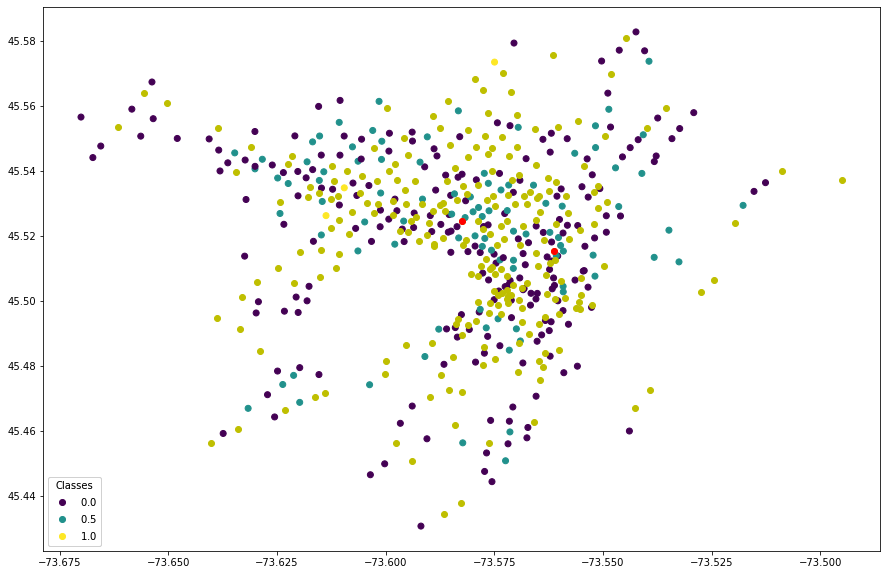

In [27]:
plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

scatter = ax.scatter(unmatched_stations_codes["longitude"], unmatched_stations_codes['latitude'], 
           c= unmatched_stations_codes['category'])

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
#purple dots representing the newly added stations in 2017
#blue dots representing removed stations


ax.scatter(matched_stations['longitude'], matched_stations['latitude'], c='y')
#gray dots representing the unchanged stations 

ax.scatter(prio_points['longitude'], prio_points['latitude'], c='r') 
#red dots representing the concerned origin and destination

ax.add_artist(legend1)

In [28]:
## Unfortunately, the red-dots seem to be have been surrounded by some stations that were clearly replaced in
# 2017 by other stations that were further away from the red-dot

#Hence, we should consider the adjusted demand when making our prediction

stations_df = pd.concat([unmatched_stations_codes, matched_stations])

#### Clean up the stations_df dataframe

In [29]:
stations_df.loc[stations_df.category.isna(),"category"] = "Fully Matched"

In [30]:
stations_df.category.value_counts()

#stations_df is the one source of truth on DataFrames

Fully Matched    235
0.0              214
0.5               94
1.0                3
Name: category, dtype: int64

In [31]:
stations_df = stations_df.replace({'category':{0:'Added in 2017', 0.5: 'Decommissioned in 2017',
                                 1:'Other'
                                }})

In [32]:
stations_df.code.is_unique

True

In [33]:
stations_df = stations_df.set_index('code')

In [34]:
stations_df

name   latitude  longitude  \
code                                                                            
7015                                LaSalle / 4e avenue  45.430740 -73.591911   
6715                     Natatorium (LaSalle / Rolland)  45.444408 -73.575568   
7048                                    Métro Angrignon  45.446534 -73.603541   
7056                                 Godin / Bannantyne  45.447554 -73.577263   
7051                                    Jogues / Allard  45.449901 -73.600251   
...                                                 ...        ...        ...   
6713                            30e avenue / St-Zotique  45.568225 -73.579436   
6702                         Chauveau / de l'Assomption  45.569789 -73.548081   
6730                              35e avenue / Beaubien  45.570081 -73.573047   
6226  Hôpital Maisonneuve-Rosemont (Rosemont / Chate...  45.575707 -73.561562   
6739                         de Repentigny / Sherbrooke  45.580770 -73.544766   

      Year_2014  Year_2015  Year_2016  Year_2017       category  
code                                                             
7015        NaN        NaN        NaN     2017.0  Added in 2017  
6715        NaN        NaN        NaN     2017.0  Added in 2017  
7048        NaN        NaN        NaN     2017.0  Added in 2017  
7056        NaN        NaN        NaN     2017.0  Added in 2017  
7051        NaN        NaN        NaN     2017.0  Added in 2017  
...         ...        ...        ...        ...            ...  
6713     2014.0     2015.0     2016.0     2017.0  Fully Matched  
6702     2014.0     2015.0     2016.0     2017.0  Fully Matched  
6730     2014.0     2015.0     2016.0     2017.0  Fully Matched  
6226     2014.0     2015.0     2016.0     2017.0  Fully Matched  
6739     2014.0     2015.0     2016.0     2017.0  Fully Matched  

[546 rows x 8 columns]

In [35]:
copy_stations_df = stations_df.copy()

### 1.2 Rides data ETL

In [36]:
folders = range(2014,2018)
active_months = range(4,12)

df_dict = dict()

for year in folders:
    for month in active_months: 
        if year == 2017 and month==9:
            break
        df = pd.read_csv(f"./data/{year}/OD_{year}-{month:02}.csv")
        print(year, month,": ", df.shape)
        df_dict[str(year)+'-'+f"{month:02}"] = df

2014 4 :  (108264, 6)
2014 5 :  (455261, 6)
2014 6 :  (525863, 6)
2014 7 :  (569352, 6)
2014 8 :  (556780, 6)
2014 9 :  (477545, 6)
2014 10 :  (331818, 6)
2014 11 :  (111393, 6)
2015 4 :  (150271, 6)
2015 5 :  (545678, 6)
2015 6 :  (547238, 6)
2015 7 :  (620865, 6)
2015 8 :  (597505, 6)
2015 9 :  (523322, 6)
2015 10 :  (332597, 6)
2015 11 :  (126407, 6)
2016 4 :  (194514, 6)
2016 5 :  (573739, 6)
2016 6 :  (645448, 6)
2016 7 :  (716335, 6)
2016 8 :  (688174, 6)
2016 9 :  (632218, 6)
2016 10 :  (397707, 6)
2016 11 :  (151945, 6)
2017 4 :  (196327, 6)
2017 5 :  (589852, 6)
2017 6 :  (748078, 6)
2017 7 :  (877338, 6)
2017 8 :  (859471, 6)


In [115]:
year = 2017
month = 9
test =pd.read_csv(f"./data/{year}/OD_{year}-{month:02}.csv")

In [117]:
test.head()

start_date  start_station_code          end_date  end_station_code  \
0  2017-09-01 00:00                6912  2017-09-01 00:08              6361   
1  2017-09-01 00:00                6927  2017-09-01 00:07              6233   
2  2017-09-01 00:00                6092  2017-09-01 00:12              6005   
3  2017-09-01 00:00                6070  2017-09-01 00:05              6064   
4  2017-09-01 00:01                7073  2017-09-01 00:19              6221   

   duration_sec  is_member  
0           530          0  
1           418          1  
2           739          1  
3           260          0  
4          1108          1

In [37]:
df_dict.keys()

dict_keys(['2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08'])

In [38]:
#Looking at a sample dataframe
df_dict['2014-04'].columns

Index(['start_date', 'start_station_code', 'end_date', 'end_station_code',
       'duration_sec', 'is_member'],
      dtype='object')

In [39]:
df_dict['2014-04'].dtypes

start_date            object
start_station_code     int64
end_date              object
end_station_code       int64
duration_sec           int64
is_member              int64
dtype: object

In [40]:
df_dict['2014-04'].head()

start_date  start_station_code          end_date  end_station_code  \
0  2014-04-15 00:01                6209  2014-04-15 00:18              6436   
1  2014-04-15 00:01                6214  2014-04-15 00:11              6248   
2  2014-04-15 00:01                6164  2014-04-15 00:18              6216   
3  2014-04-15 00:01                6214  2014-04-15 00:24              6082   
4  2014-04-15 00:02                6149  2014-04-15 00:08              6265   

   duration_sec  is_member  
0          1061          1  
1           615          1  
2          1031          1  
3          1382          1  
4           347          1

In [41]:
full_data = df = pd.concat(df_dict)

In [42]:
df.shape

(13851305, 6)

In [43]:
#Check for nulls

df.isna().sum()

start_date            0
start_station_code    0
end_date              0
end_station_code      0
duration_sec          0
is_member             0
dtype: int64

In [44]:
#Yay! No nulls. 

#Convert start_date and end_date to date time

df.start_date = pd.to_datetime(df.start_date)
df.end_date = pd.to_datetime(df.end_date)


In [45]:
df.columns

Index(['start_date', 'start_station_code', 'end_date', 'end_station_code',
       'duration_sec', 'is_member'],
      dtype='object')

In [46]:
df.describe()

start_station_code  end_station_code  duration_sec     is_member
count        1.385130e+07      1.385130e+07  1.385130e+07  1.385130e+07
mean         6.267494e+03      6.261352e+03  8.256380e+02  8.287203e-01
std          3.125649e+02      3.206701e+02  6.587065e+02  3.767532e-01
min          5.002000e+03      5.002000e+03  6.100000e+01  0.000000e+00
25%          6.100000e+03      6.085000e+03  3.740000e+02  1.000000e+00
50%          6.192000e+03      6.184000e+03  6.560000e+02  1.000000e+00
75%          6.322000e+03      6.332000e+03  1.100000e+03  1.000000e+00
max          1.000200e+04      1.000200e+04  7.199000e+03  1.000000e+00

In [47]:
df.is_member = df.is_member.astype('bool')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13851305 entries, ('2014-04', 0) to ('2017-08', 859470)
Data columns (total 6 columns):
 #   Column              Dtype         
---  ------              -----         
 0   start_date          datetime64[ns]
 1   start_station_code  int64         
 2   end_date            datetime64[ns]
 3   end_station_code    int64         
 4   duration_sec        int64         
 5   is_member           bool          
dtypes: bool(1), datetime64[ns](2), int64(3)
memory usage: 646.6+ MB


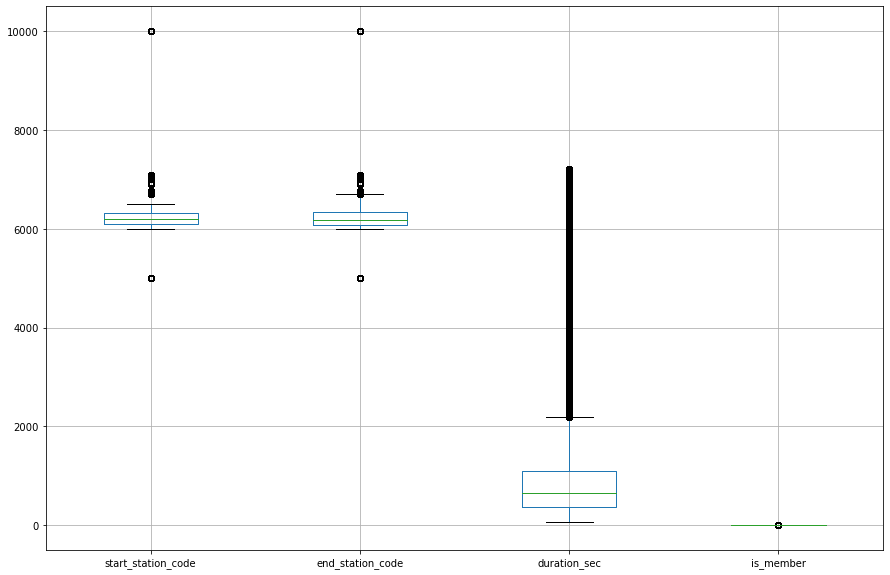

In [49]:
df.boxplot()

plt.show()

In [50]:
df.profile_report()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Some observations:
* Not too many surprises, but interestingly:
    * No nulls or nans - clean data in that sense 
    * There is a clear up-tick in the number of users over the years, that's almost growing exponentially
    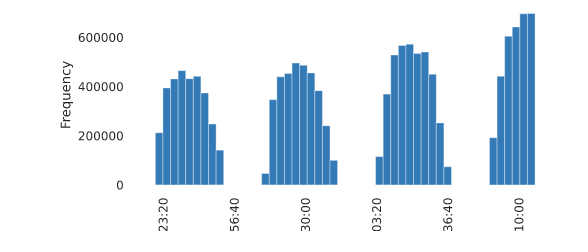
    
    * Some correlation between start and end points- presumably a lot of same location drop-offs:
    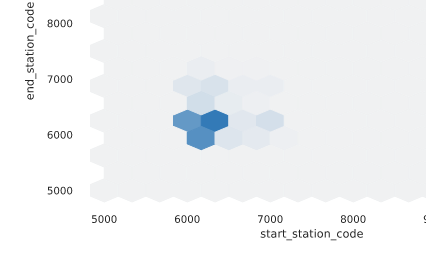
    * Some negative correlation between being a mamber and duration; Means non-members only rent the bike for longer rides:
    
    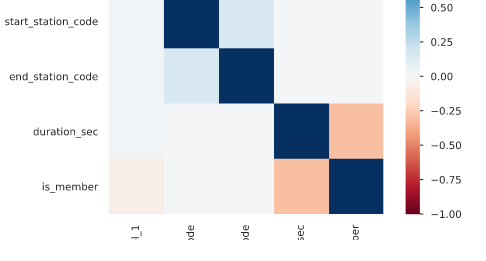
    
   
 * As expected, a log normal(or exponential?) distribution of the duration:
 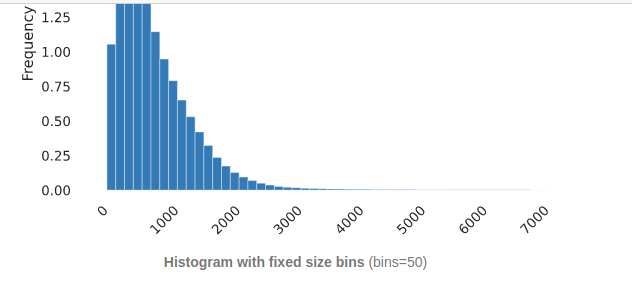
    
    

## 2. Initial visualizations 

### 2.1  duration_sec distribution

#### 2.1.1 Check for outliers

In [51]:
df.columns

Index(['start_date', 'start_station_code', 'end_date', 'end_station_code',
       'duration_sec', 'is_member'],
      dtype='object')

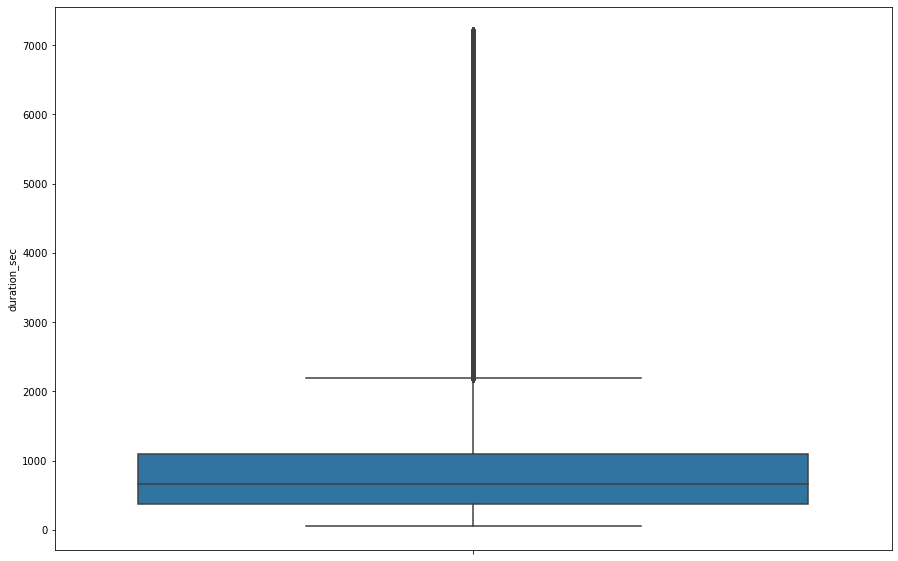

In [52]:
sns.boxplot(y="duration_sec", data = df)
plt.show()

The above chart suggests a number of outliers which is not ideal for duration_sec. 
May be because of  data issues. We will seek to resolve this using the elbow method. 

In [53]:
for q in np.linspace(0,1,11):
    print(q, ":", df.duration_sec.quantile(q))

0.0 : 61.0
0.1 : 229.0
0.2 : 326.0
0.30000000000000004 : 424.0
0.4 : 531.0
0.5 : 656.0
0.6000000000000001 : 803.0
0.7000000000000001 : 988.0
0.8 : 1231.0
0.9 : 1602.0
1.0 : 7199.0


In [54]:
import matplotlib.pyplot as plt

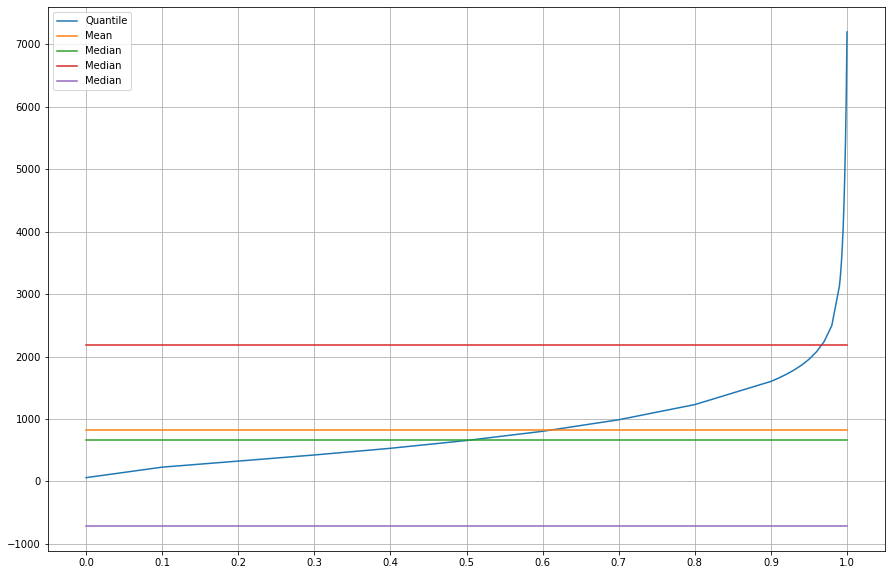

In [55]:
Q1 = df['duration_sec'].quantile(0.25)
Q3 = df['duration_sec'].quantile(0.75)
IQR = Q3 - Q1

q= np.hstack((np.linspace(0,0.9,10), np.linspace(0.91,0.99,9), np.linspace(0.991,1.0, 10)))
plt.plot(q, df.duration_sec.quantile(q), label = 'Quantile')
plt.plot(q, [df.duration_sec.mean()]*29, label='Mean')
plt.plot(q, [df.duration_sec.median()]*29 , label= 'Median')
plt.plot(q, [Q3+ 1.5 * IQR]*29 , label= 'Median')
plt.plot(q, [Q1-1.5 * IQR]*29 , label= 'Median')

plt.legend()
plt.grid(True)
plt.xticks(ticks = np.linspace(0,1,11))

plt.show()

In [56]:
for q in np.linspace(0.9,1,11):
    print(q, ":", df.duration_sec.quantile(q))

0.9 : 1602.0
0.91 : 1655.0
0.92 : 1714.0
0.93 : 1781.0
0.9400000000000001 : 1860.0
0.95 : 1956.0
0.96 : 2078.0
0.97 : 2242.0
0.98 : 2497.0
0.99 : 3128.0
1.0 : 7199.0


In [57]:
for q in np.linspace(0.99,1,11):
    print(q, ":", df.duration_sec.quantile(q))

0.99 : 3128.0
0.991 : 3252.0
0.992 : 3404.0
0.993 : 3584.0
0.994 : 3811.0
0.995 : 4090.0
0.996 : 4447.0
0.997 : 4895.0
0.998 : 5454.0
0.999 : 6191.0
1.0 : 7199.0


#### 2.1.2 Check for distribution of duration_sec

/home/santhosh/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


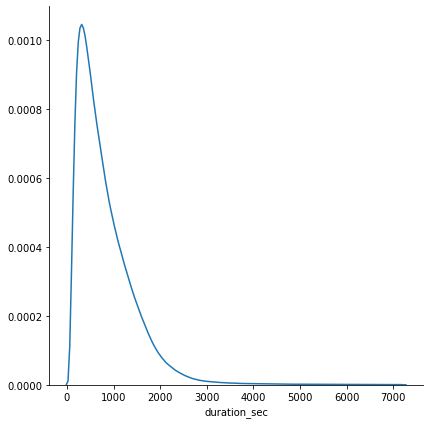

In [58]:
sns.FacetGrid(df, size=6)\
   .map(sns.kdeplot,"duration_sec")\
   .add_legend()

plt.show()

#Appears to look like a log normal pretty much

/home/santhosh/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


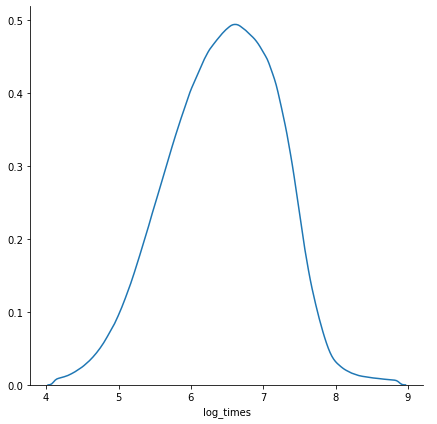

In [59]:
df['log_times']= np.log(df.duration_sec)
#pdf of log-values
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"log_times") \
      .add_legend();
plt.show();

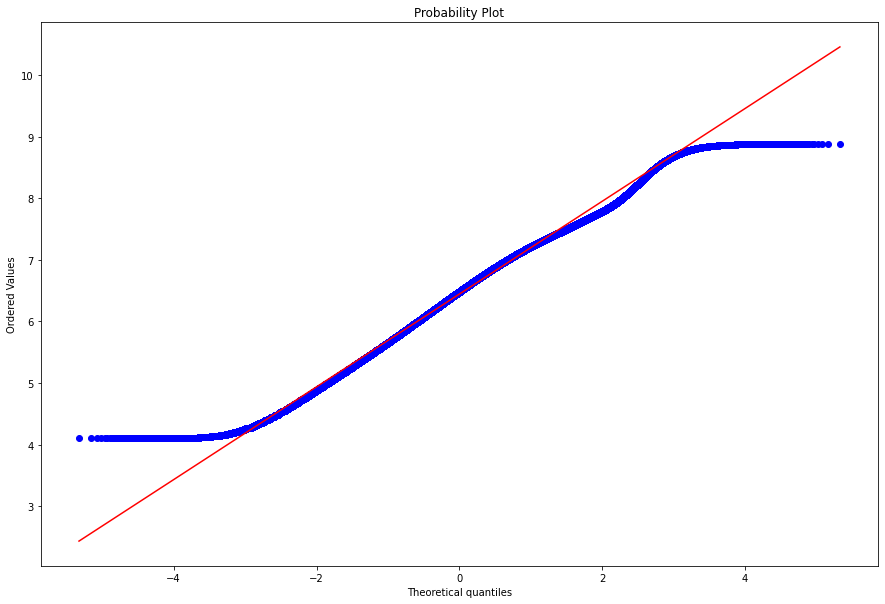

In [60]:
#Q-Q plot for checking if trip-times is log-normal
scipy.stats.probplot(df['log_times'].values, plot=plt)
plt.show()

Clearly, this data is log-normal, but cleaned well and cut-off at T= 0 s (naturally) and T = 2 hrs,beyond which it is most likely a fringe case, e.g., the bikes were lost etc. 

Good news is that we don't need to spend too much time cleaning it. 


### 2.3 Station distribution visualizations

Here the first objective is to cluster the stations, otherwise, it's too many stations to visualize easily on a map

In [61]:
stations_df.category.value_counts()

Fully Matched             235
Added in 2017             214
Decommissioned in 2017     94
Other                       3
Name: category, dtype: int64

In [62]:
stations_info= df.groupby(by= [df.start_station_code])['duration_sec'].sum()

stations_info = pd.DataFrame(stations_info)

stations_info.columns = ['total_duration']

In [63]:
stations_info['total_trips'] = df.groupby(by= [df.start_station_code])['duration_sec'].count()

array([[<AxesSubplot:title={'center':'total_duration'}>,
        <AxesSubplot:title={'center':'total_trips'}>]], dtype=object)

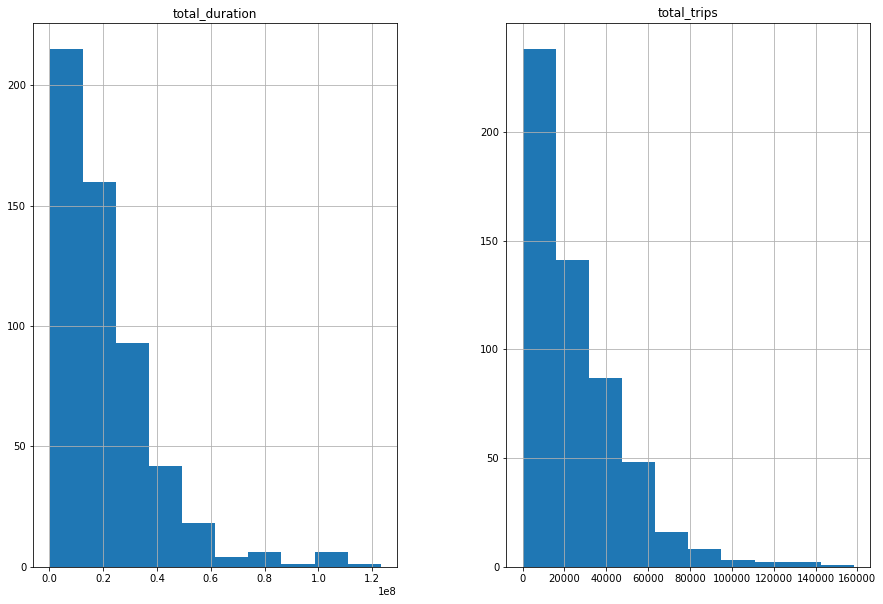

In [64]:
stations_info.hist()

### 2.4 Demand visualization by start_date time of day

In [65]:
year_time_dist = df.groupby(by =[df.start_date.dt.year, df.start_date.dt.time]).agg({"duration_sec":[np.sum, np.size]})

In [66]:
year_time_dist.index = year_time_dist.index.set_names(['Year', 'Time of day'])

year_time_dist.columns = year_time_dist.columns.get_level_values(1)

year_time_dist = year_time_dist.reset_index()

year_time_dist = year_time_dist.set_index('Year')

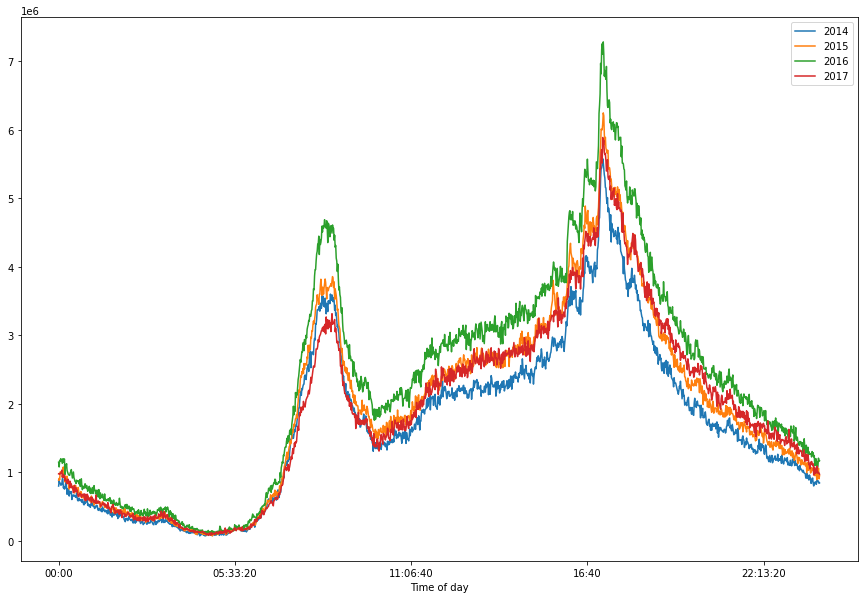

In [67]:
%matplotlib inline 


fig, axs = plt.subplots(figsize=(15,10))

year_time_dist.xs('2014').plot(x='Time of day', y='sum', label = '2014', ax = axs)
year_time_dist.xs('2015').plot(x='Time of day', y='sum', label = '2015', ax= axs)
year_time_dist.xs('2016').plot(x='Time of day', y='sum', label = '2016', ax= axs)
year_time_dist.xs('2017').plot(x='Time of day', y='sum', label = '2017', ax= axs)

plt.show()

In [68]:
axs.axis()

(-4317.0, 90657.0, -288389.60000000003, 7640709.6)

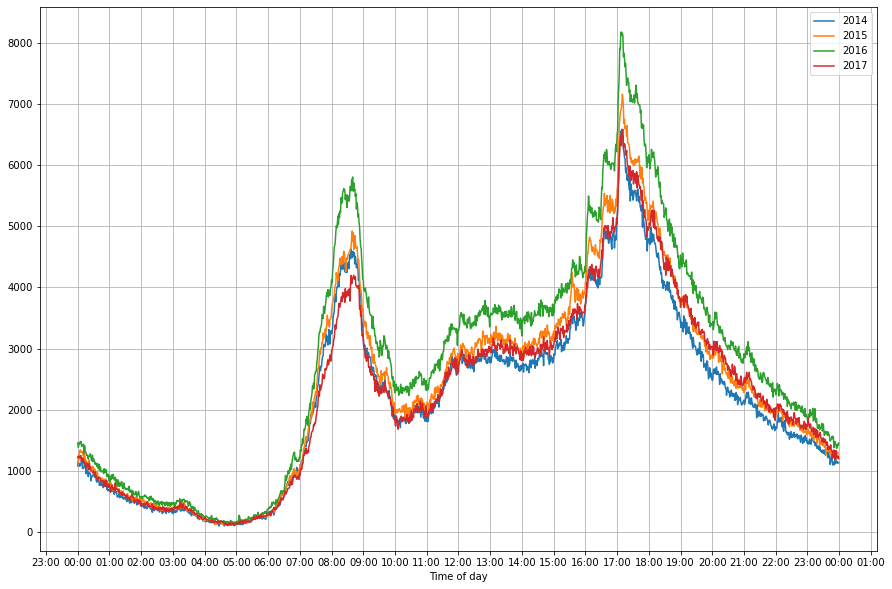

In [69]:
fig, axs = plt.subplots(figsize=(15,10))

year_time_dist.xs('2014').plot(x='Time of day', y='size',  label = '2014', ax = axs)
year_time_dist.xs('2015').plot(x='Time of day', y='size',  label = '2015', ax= axs)
year_time_dist.xs('2016').plot(x='Time of day', y='size',  label = '2016', ax= axs)
year_time_dist.xs('2017').plot(x='Time of day', y='size',  label = '2017', ax= axs)

axs.xaxis.set_major_locator(ticker.MultipleLocator(3600))
axs.grid(True)


plt.show()

Some key observations:

1. Clear peak during the mornings that's a steep rise between 8-9 am. 
2. and a more gradual rise from 3-5 pm. 
3. There are more users in the evening than during the morning rush and it does have a slow drip down after 5 pm 

### 2.5 Demand visualization by time of year

In [70]:
year_date_dist = df.groupby(by =[df.start_date.dt.year, df.start_date.dt.dayofyear]).agg({"duration_sec":[np.sum, np.size]})

In [71]:
year_date_dist.index = year_date_dist.index.set_names(['Year', 'Date of year'])

In [72]:
year_date_dist.columns = year_date_dist.columns.get_level_values(1)

year_date_dist = year_date_dist.reset_index(level=1)

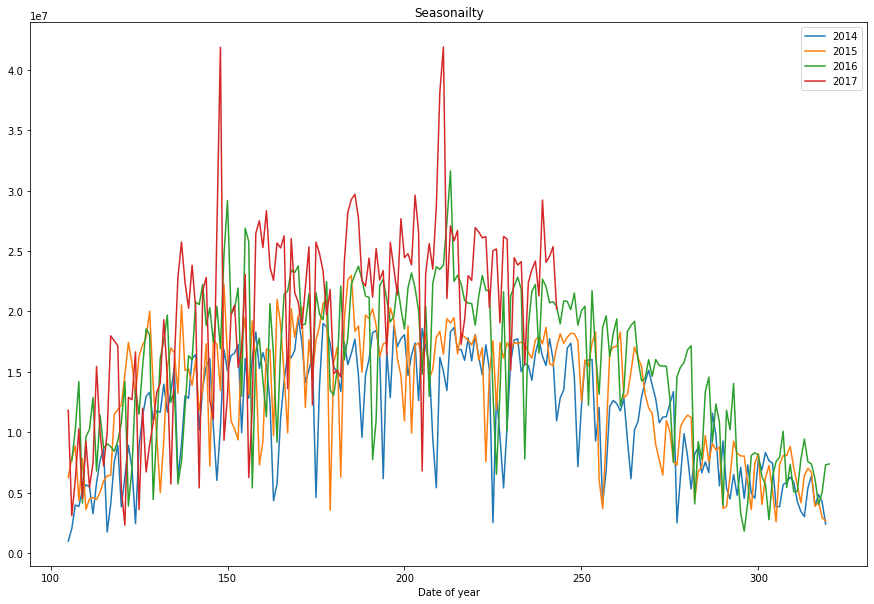

In [73]:
fig, axs = plt.subplots(figsize=(15,10))

year_date_dist.xs('2014').plot(x='Date of year', y='sum', label = '2014', ax = axs)
year_date_dist.xs('2015').plot(x='Date of year', y='sum', label = '2015', ax= axs)
year_date_dist.xs('2016').plot(x='Date of year', y='sum', label = '2016', ax= axs)
year_date_dist.xs('2017').plot(x='Date of year', y='sum', label = '2017', ax= axs)

axs.set_title('Seasonailty')

plt.show()

Clearly this chart doesn't show any thing useful because there's too much noise. An exponential moving average may be better. But in general:

1. Annual increase observed, as expected
2. Peak closer to day 200 of the year, which is Jun-July period. 
3. Huge rush when they do open around day 100. Business insight:->  Perhaps we can open a bit sooner and may get a slightly higher uptick

## 3. Data Cleaning 

It seems that the data is already quite clean and there is no need to additional clean the data. That is the current assumption. 4/18/2021, 16:40:22 IST

## 4. Feature Engineering 

### 4.1 Clustering the stations

In [74]:
stations_df.head()

name   latitude  longitude  Year_2014  \
code                                                                    
7015             LaSalle / 4e avenue  45.430740 -73.591911        NaN   
6715  Natatorium (LaSalle / Rolland)  45.444408 -73.575568        NaN   
7048                 Métro Angrignon  45.446534 -73.603541        NaN   
7056              Godin / Bannantyne  45.447554 -73.577263        NaN   
7051                 Jogues / Allard  45.449901 -73.600251        NaN   

      Year_2015  Year_2016  Year_2017       category  
code                                                  
7015        NaN        NaN     2017.0  Added in 2017  
6715        NaN        NaN     2017.0  Added in 2017  
7048        NaN        NaN     2017.0  Added in 2017  
7056        NaN        NaN     2017.0  Added in 2017  
7051        NaN        NaN     2017.0  Added in 2017

In [75]:
from sklearn.cluster import MiniBatchKMeans, KMeans
import gpxpy.geo #Get the haversine distance

In [76]:
# we perform a basic clustering based on simplistic logic of distance 

coords= stations_df[['latitude','longitude']].values
neighbours= []

def find_min_distance(cluster_centers, cluster_len):
    nice_points = 0
    wrong_points = 0
    less2 = []
    more2 = []
    min_dist=1000
    for i in range(0, cluster_len):
        nice_points = 0
        wrong_points = 0
        for j in range(0, cluster_len):
            if j!=i:
                distance = gpxpy.geo.haversine_distance(cluster_centers[i][0], cluster_centers[i][1],cluster_centers[j][0], cluster_centers[j][1])
                min_dist = min(min_dist,distance/(1.60934*1000))
                if (distance/(1.60934*1000)) <= 2:
                    nice_points +=1
                else:
                    wrong_points += 1
        less2.append(nice_points)
        more2.append(wrong_points)
    neighbours.append(less2)
    print ("On choosing a cluster size of ",cluster_len,"\nAvg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2):", np.ceil(sum(less2)/len(less2)), "\nAvg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2):", np.ceil(sum(more2)/len(more2)),"\nMin inter-cluster distance = ",min_dist,"\n---")

def find_clusters(increment):
    kmeans = MiniBatchKMeans(n_clusters=increment, batch_size=10000,random_state=42).fit(coords)
    stations_df['cluster'] = kmeans.predict(stations_df[['latitude', 'longitude']])
    cluster_centers = kmeans.cluster_centers_
    cluster_len = len(cluster_centers)
    return cluster_centers, cluster_len

# we need to choose number of clusters so that, there are more number of cluster regions 
#that are close to any cluster center
# and make sure that the minimum inter cluster should not be very less
for increment in range(10, 100, 10):
    cluster_centers, cluster_len = find_clusters(increment)
    find_min_distance(cluster_centers, cluster_len)            

On choosing a cluster size of  10 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 2.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 8.0 
Min inter-cluster distance =  1.4612362401836245 
---
On choosing a cluster size of  20 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 4.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 16.0 
Min inter-cluster distance =  0.8322674736248178 
---
On choosing a cluster size of  30 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 6.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 24.0 
Min inter-cluster distance =  0.6539676684090463 
---
On choosing a cluster size of  40 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 8.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 32.0 
Min inter-cluster distance 

In [77]:
# if check for the 60 clusters you can observe that there are two clusters with only 0.5 miles apart from each other
# so we choose 50 clusters for solve the further problem

# Getting 50 clusters using the kmeans 
kmeans = MiniBatchKMeans(n_clusters=50, batch_size=10000,random_state=0).fit(coords)
stations_df['cluster'] = kmeans.predict(stations_df[['latitude', 'longitude']])

In [78]:
# Plotting the cluster centers on OSM
cluster_centers = kmeans.cluster_centers_
cluster_len = len(cluster_centers)
map_osm = folium.Map(location=[45.524673, -73.58255], tiles='Stamen Toner')
for i in range(cluster_len):
    folium.Marker(list((cluster_centers[i][0],cluster_centers[i][1])), 
                  popup=(str(cluster_centers[i][0])+str(cluster_centers[i][1]))).add_to(map_osm)
map_osm

In [79]:
stations_df.xs(6184)

name         Métro Mont-Royal (Rivard / du Mont-Royal)
latitude                                     45.524673
longitude                                    -73.58255
Year_2014                                       2014.0
Year_2015                                       2015.0
Year_2016                                       2016.0
Year_2017                                       2017.0
category                                 Fully Matched
cluster                                             38
Name: 6184, dtype: object

In [80]:
print(
    stations_df.latitude.min(), 
stations_df.latitude.max(),
stations_df.longitude.min(),
stations_df.longitude.max())

45.43074022417498 45.58275715603392 -73.67011472582817 -73.49506705999374


### 4.2  Plotting the stations clusters

In [81]:
prio_points

code                                       name   latitude  longitude  \
105  6015                     Berri / de Maisonneuve  45.515299 -73.561273   
55   6184  Métro Mont-Royal (Rivard / du Mont-Royal)  45.524673 -73.582550   

     Year_2014  Year_2015  Year_2016  Year_2017  
105     2014.0     2015.0     2016.0     2017.0  
55      2014.0     2015.0     2016.0     2017.0

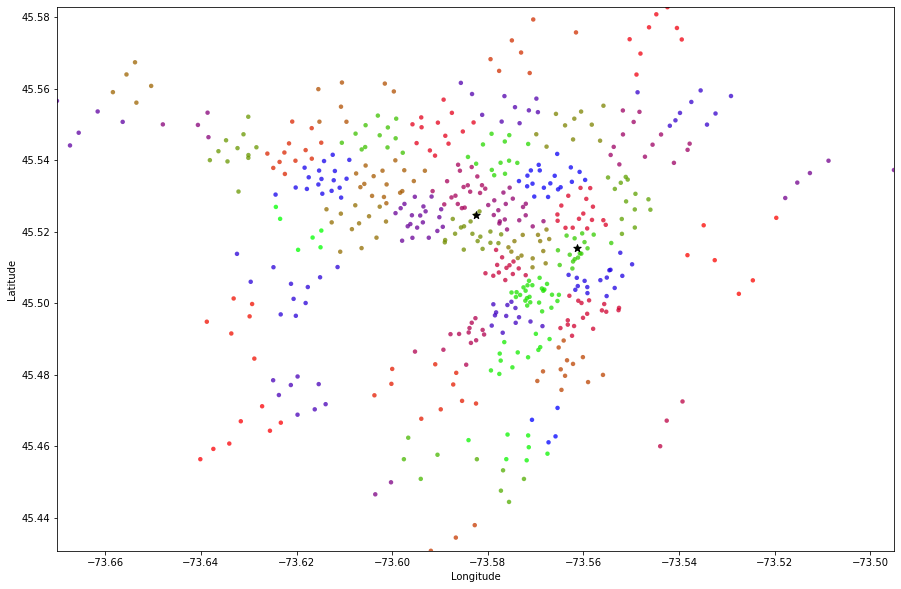

In [82]:
#Visualising the clusters on a map
def plot_clusters(frame):
    city_long_border = (-73.67011472582817, -73.49506705999374)
    city_lat_border = (45.43074022417498, 45.58275715603392)
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
    ax.scatter(frame.longitude.values, frame.latitude.values, s=20, lw=0,
               c=frame.cluster.values, cmap='brg', alpha=0.75)
    ax.set_xlim(city_long_border)
    ax.set_ylim(city_lat_border)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.scatter(prio_points['longitude'], prio_points['latitude'], c='k',  marker='*', s=60, alpha=1) 
    
    plt.show()

plot_clusters(stations_df)

While 50 clusters is a bit too many , it does show that at the Metro Mont-Royal pick up point, it seems to belong to a cluster that was previously served by stations that were eventually replaced in 2017. So we need to pay attention to that, when the results are released. 

### 4.2_ Merging cluster info into df

In [83]:
df.head()

start_date  start_station_code            end_date  \
2014-04 0 2014-04-15 00:01:00                6209 2014-04-15 00:18:00   
        1 2014-04-15 00:01:00                6214 2014-04-15 00:11:00   
        2 2014-04-15 00:01:00                6164 2014-04-15 00:18:00   
        3 2014-04-15 00:01:00                6214 2014-04-15 00:24:00   
        4 2014-04-15 00:02:00                6149 2014-04-15 00:08:00   

           end_station_code  duration_sec  is_member  log_times  
2014-04 0              6436          1061       True   6.966967  
        1              6248           615       True   6.421622  
        2              6216          1031       True   6.938284  
        3              6082          1382       True   7.231287  
        4              6265           347       True   5.849325

In [84]:
stations_df.head()

name   latitude  longitude  Year_2014  \
code                                                                    
7015             LaSalle / 4e avenue  45.430740 -73.591911        NaN   
6715  Natatorium (LaSalle / Rolland)  45.444408 -73.575568        NaN   
7048                 Métro Angrignon  45.446534 -73.603541        NaN   
7056              Godin / Bannantyne  45.447554 -73.577263        NaN   
7051                 Jogues / Allard  45.449901 -73.600251        NaN   

      Year_2015  Year_2016  Year_2017       category  cluster  
code                                                           
7015        NaN        NaN     2017.0  Added in 2017       30  
6715        NaN        NaN     2017.0  Added in 2017       41  
7048        NaN        NaN     2017.0  Added in 2017       12  
7056        NaN        NaN     2017.0  Added in 2017       41  
7051        NaN        NaN     2017.0  Added in 2017       12

In [87]:
df['start_cluster'] = df.merge(stations_df['cluster'], left_on='start_station_code', right_index=True)['cluster']

In [88]:
df['end_cluster'] = df.merge(stations_df['cluster'], left_on= 'end_station_code', right_index=True)['cluster']

The following suggests the number of "trips" for each bucket (cluster, date), based on the size of the dataframe. Gives that there's no "smoothing" that's necessary:

In [89]:
df.shape[0]/50/(120*3 + 90)

615.6135555555555

Reviewing the number of possible pairs. 

In [90]:
start_end_pairs= (df['start_station_code'].map(str)+ '-' + df['end_station_code'].map(str))

In [91]:
start_end_pairs.nunique()

221970

In [92]:
546*546

298116

In [93]:
221970/298116

0.7445759368836292

There are slightly fewer than the maximum number of pairs, around 75%. 

### 4.3 Time binning only

In [94]:
df_by_date = df.groupby(by=[df.start_date.dt.date, 'start_station_code','end_station_code', 'is_member']).agg({"duration_sec":[np.sum, np.size]})

df_by_date= df_by_date.reset_index(level=3)

df_by_date= (df_by_date.pivot(columns='is_member')).fillna(0)

print(df_by_date.columns)

df_by_date[('duration_sec', 'sum', 'Total')] = (df_by_date[('duration_sec', 'sum', True)] + \
                                                        df_by_date[('duration_sec', 'sum', False)])

df_by_date[('duration_sec', 'size', 'Total')] = (df_by_date[('duration_sec', 'size', True)] + \
                                                        df_by_date[('duration_sec', 'size', False)])


MultiIndex([('duration_sec',  'sum', False),
            ('duration_sec',  'sum',  True),
            ('duration_sec', 'size', False),
            ('duration_sec', 'size',  True)],
           names=[None, None, 'is_member'])


In [95]:
df_by_date.shape

(9686139, 6)

In [96]:
df_by_date.iloc[:,5].mean()

1.4300130320244218

An average start-end station pair only receives ~1.5 rides per day. 

In [97]:
df.groupby(by=[df.start_date.dt.date, 'start_station_code']).agg({"duration_sec":[np.size]})

duration_sec
                                      size
start_date start_station_code             
2014-04-15 5007                          1
           6001                          5
           6003                          1
           6008                          2
           6009                          5
...                                    ...
2017-08-31 7078                         23
           7079                         37
           7080                         80
           7081                         28
           10002                        92

[357391 rows x 1 columns]

In [98]:
_[('duration_sec','size')].mean()

38.756725826895476

At any given starting station, there are approximately ~38 rides per day; which are quite log-normal, as verified in Section 2.3

### 4.4 Time binning and clustering

The question is interested in daily forecast. Hence, we only care about daily numbers at this time.  So we will bin demand into bins of each day. 

In [99]:
cluster_df_by_date = df.groupby(by=[df.start_date.dt.date, 'start_cluster','end_cluster', 'is_member']).agg({"duration_sec":[np.sum, np.size]})

cluster_df_by_date= cluster_df_by_date.reset_index(level=3)

cluster_df_by_date= (cluster_df_by_date.pivot(columns='is_member')).fillna(0)

cluster_df_by_date.columns

cluster_df_by_date[('duration_sec', 'sum', 'Total')] = (cluster_df_by_date[('duration_sec', 'sum', True)] + \
                                                        cluster_df_by_date[('duration_sec', 'sum', False)])

cluster_df_by_date[('duration_sec', 'size', 'Total')] = (cluster_df_by_date[('duration_sec', 'size', True)] + \
                                                        cluster_df_by_date[('duration_sec', 'size', False)])


<AxesSubplot:xlabel='start_date'>

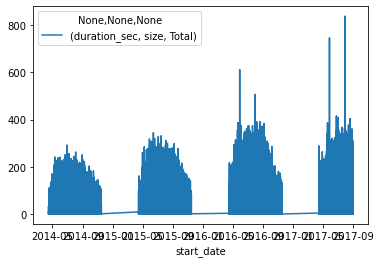

In [100]:
cluster_df_by_date.reset_index().plot(x= 'start_date', y= ('duration_sec', 'size', 'Total') )

In [101]:
cluster_df_by_date.columns = ['total_duration_members', 'total_duration_non_members',
                              'rides_count_members', 'rides_count_non_members',
                             'total_duration_all', 'rides_count_all']

cluster_df_by_date.head(20)

total_duration_members  \
start_date start_cluster end_cluster                           
2014-04-15 1             1                               0.0   
                         2                               0.0   
                         3                            1029.0   
                         5                               0.0   
                         8                             827.0   
                         10                              0.0   
                         14                              0.0   
                         15                              0.0   
                         16                              0.0   
                         18                              0.0   
                         19                              0.0   
                         21                              0.0   
                         36                              0.0   
                         37                              0.0   
                         38                           1751.0   
                         40                              0.0   
                         44                              0.0   
                         45                              0.0   
                         46                              0.0   
           2             2                               0.0   

                                      total_duration_non_members  \
start_date start_cluster end_cluster                               
2014-04-15 1             1                                2956.0   
                         2                                1588.0   
                         3                                6127.0   
                         5                                1218.0   
                         8                                 599.0   
                         10                               3093.0   
                         14                               3119.0   
                         15                                922.0   
                         16                               2894.0   
                         18                               1678.0   
                         19                               2778.0   
                         21                               2446.0   
                         36                               5405.0   
                         37                                420.0   
                         38                               4999.0   
                         40                               3622.0   
                         44                               3922.0   
                         45                               1203.0   
                         46                               7355.0   
           2             2                                 977.0   

                                      rides_count_members  \
start_date start_cluster end_cluster                        
2014-04-15 1             1                            0.0   
                         2                            0.0   
                         3                            1.0   
                         5                            0.0   
                         8                            1.0   
                         10                           0.0   
                         14                           0.0   
                         15                           0.0   
                         16                           0.0   
                         18                           0.0   
                         19                           0.0   
                         21                           0.0   
                         36                           0.0   
                         37                           0.0   
                         38                           2.0   
                         40                           0.0   
                         44       

## 5. Time Series Analysis

This section attempts to use the SARIMAX model which compromises of the Seasonal, Auto-correlation, Integrated (difference), and Moving Average approaches to provide a daily forecast for trips originating from 6184 to 6015, for the week of Sept 4th 2017.

The simplest approach is to find the demand for the cluster-pair we are concerned about. 

In [102]:
prio_points= prio_points.merge(stations_df['cluster'], left_on='code',right_index=True)

In [103]:
prio_points

code                                       name   latitude  longitude  \
105  6015                     Berri / de Maisonneuve  45.515299 -73.561273   
55   6184  Métro Mont-Royal (Rivard / du Mont-Royal)  45.524673 -73.582550   

     Year_2014  Year_2015  Year_2016  Year_2017  cluster  
105     2014.0     2015.0     2016.0     2017.0       44  
55      2014.0     2015.0     2016.0     2017.0       38

Hence, we will focus on the demand from cluster 44 to cluster 38

In [104]:
prio_clusters_daily_rides = cluster_df_by_date.reset_index(level=0).xs((44,38))

/home/santhosh/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2940: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


In [105]:
prio_clusters_daily_rides= prio_clusters_daily_rides.reset_index(drop=True)
prio_clusters_daily_rides= prio_clusters_daily_rides.set_index('start_date')

<AxesSubplot:xlabel='start_date'>

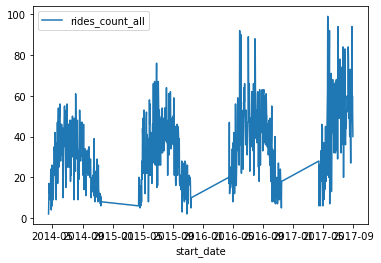

In [106]:
prio_clusters_daily_rides.plot( y= 'rides_count_all')

In [107]:
#First we check for stationarity

from statsmodels.tsa.stattools import adfuller

In [108]:
result = adfuller(prio_clusters_daily_rides['rides_count_all'])

In [109]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(result):
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [110]:
adfuller_test(result)

ADF Test Statistic : -2.2861799366115974
p-value : 0.17646396407108872
#Lags Used : 13
Number of Observations Used : 770
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Not surprising at all that it's non-stationary. We now try to do some kind of differencing

In [119]:
prio_clusters_daily_rides.shape

(784, 6)

In [112]:
from pmdarima.arima import auto_arima

In [113]:
train = prio_clusters_daily_rides['rides_count_all']

In [187]:
arima_model = auto_arima(train.loc[dt.date(2017,1,1):], start_p= 0, d=1, start_q= 0, max_p= 5, max_d= 5, max_q= 5, 
                         start_P=0, D=1, start_Q = 0, max_P= 5, max_D=5, m = 7, season=True, 
                         error_action = 'warn', trace= True, supress_warnings = True, stepwise =True, 
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1200.697, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1166.520, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=1095.842, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=inf, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=0.20 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=1123.888, Time=0.06 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=inf, Time=0.05 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=1096.479, Time=0.17 sec
 ARIMA(0,1,2)(0,1,1)[7]             : AIC=1096.216, Time=0.17 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=inf, Time=0.13 sec
 ARIMA(1,1,2)(0,1,1)[7]             : AIC=1096.730, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,1,1)[7]          
Total fit time: 1.624

In [188]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  139
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood                -544.921
Date:                           Mon, 19 Apr 2021   AIC                           1095.842
Time:                                   01:09:58   BIC                           1104.467
Sample:                                        0   HQIC                          1099.347
                                           - 139                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8854      0.042    -20.849      0.000      -0.969      -0.802
ma.S.L7       -0.8929      0.096     -9.307      0.000      -1.081      -0.705
sigma2       216.5712     24.876      8.706      0.000     167.814     265.328
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):                14.60
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             0.52
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [209]:
base = dt.date(2017,9,1)
numdays = 11
date_list = [base + dt.timedelta(days=x) for x in range(numdays)]

minor_ticks = [dt.date(2017,4,1) + dt.timedelta(days=x) for x in range(0,180,7)]

In [204]:
prediction = pd.DataFrame(arima_model.predict(n_periods=11), index=date_list)

prediction.columns = ['Predicted rides']

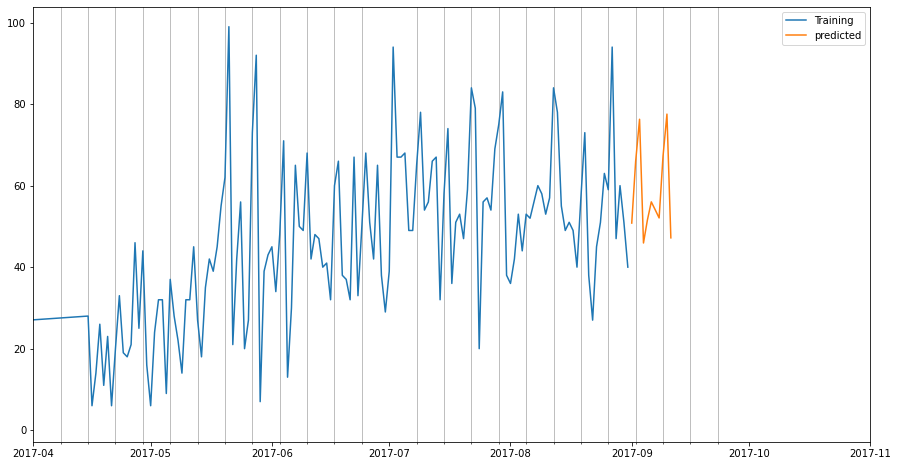

In [210]:
fig, ax = plt.subplots(figsize=(15,8))


plt.plot(train, label='Training')
plt.plot(prediction, label='predicted')
plt.legend(loc='best')
ax.set_xticks(minor_ticks, minor=True)

ax.grid(which='minor')

ax.set_xlim(( dt.date(2017, 4, 1), dt.date(2017, 11, 1)))

plt.show()

While this simplistic model fails to appreciate the annual seasonality (e.g., the demand decreases as we go later in the year), the moving average part of the ARIMA will capture it for short term predictions. 

Hence, this model would need to 'updated' regularly. 


The weekly pattern is very clear and we definitely see that the ARIMA does predict it. 

The significant concern here is that we are faily to appreciate the "monthly seasonality" that we may have learnt from the past year's data. Indeed, we can safely assume that this "learning" is not that useful because we only have a few months of data. 

## 6. Machine Learning based predictions

## 7. Prediction and Conclusion